## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.844988 -0.016848  0.531367 -0.242474  1.063137  0.773340
1  1.139886 -1.508633  0.291514 -1.517173  1.627007 -1.692082
2 -1.701327  1.211528  0.272827 -1.721949 -1.622486 -2.694117
3 -0.558348 -1.580096  0.970412  0.987921 -1.186297 -0.662827
4 -0.281187  1.957705 -0.909988 -0.343577 -1.722441  0.112021


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9985344	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9883530	total: 70.1ms	remaining: 35s
2:	learn: 0.9794322	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9705393	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9607995	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9526331	total: 72.4ms	remaining: 12s
6:	learn: 0.9423135	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9324145	total: 73.5ms	remaining: 9.11s
8:	learn: 0.9247183	total: 74ms	remaining: 8.15s
9:	learn: 0.9165385	total: 74.7ms	remaining: 7.39s
10:	learn: 0.9108253	total: 75.3ms	remaining: 6.76s
11:	learn: 0.9018306	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8935278	total: 76.2ms	remaining: 5.79s
13:	learn: 0.8855541	total: 76.7ms	remaining: 5.4s
14:	learn: 0.8786405	total: 77.1ms	remaining: 5.06s
15:	learn: 0.8725636	total: 77.6ms	remaining: 4.77s
16:	learn: 0.8644252	total: 78ms	remaining: 4.51s
17:	learn: 0.8564579	total: 78.5ms	remaining: 4.28s
18:	learn: 0.8482071	total: 79ms	remaining: 4.08s
19:

84:	learn: 0.4994708	total: 109ms	remaining: 1.18s
85:	learn: 0.4954611	total: 110ms	remaining: 1.17s
86:	learn: 0.4921425	total: 110ms	remaining: 1.16s
87:	learn: 0.4894249	total: 111ms	remaining: 1.15s
88:	learn: 0.4852916	total: 111ms	remaining: 1.14s
89:	learn: 0.4816586	total: 112ms	remaining: 1.13s
90:	learn: 0.4778556	total: 112ms	remaining: 1.12s
91:	learn: 0.4738670	total: 113ms	remaining: 1.11s
92:	learn: 0.4703244	total: 113ms	remaining: 1.1s
93:	learn: 0.4668440	total: 113ms	remaining: 1.09s
94:	learn: 0.4632906	total: 114ms	remaining: 1.08s
95:	learn: 0.4594753	total: 114ms	remaining: 1.08s
96:	learn: 0.4562852	total: 115ms	remaining: 1.07s
97:	learn: 0.4525295	total: 115ms	remaining: 1.06s
98:	learn: 0.4498073	total: 116ms	remaining: 1.05s
99:	learn: 0.4470023	total: 116ms	remaining: 1.05s
100:	learn: 0.4441482	total: 117ms	remaining: 1.04s
101:	learn: 0.4403092	total: 117ms	remaining: 1.03s
102:	learn: 0.4371280	total: 118ms	remaining: 1.02s
103:	learn: 0.4342144	total: 

241:	learn: 0.1656635	total: 188ms	remaining: 588ms
242:	learn: 0.1645616	total: 188ms	remaining: 587ms
243:	learn: 0.1635454	total: 189ms	remaining: 585ms
244:	learn: 0.1625330	total: 189ms	remaining: 584ms
245:	learn: 0.1615562	total: 190ms	remaining: 582ms
246:	learn: 0.1604342	total: 190ms	remaining: 580ms
247:	learn: 0.1593785	total: 191ms	remaining: 578ms
248:	learn: 0.1581725	total: 191ms	remaining: 577ms
249:	learn: 0.1569634	total: 192ms	remaining: 575ms
250:	learn: 0.1558043	total: 192ms	remaining: 573ms
251:	learn: 0.1548344	total: 192ms	remaining: 571ms
252:	learn: 0.1539852	total: 193ms	remaining: 570ms
253:	learn: 0.1531377	total: 193ms	remaining: 568ms
254:	learn: 0.1521078	total: 194ms	remaining: 567ms
255:	learn: 0.1510766	total: 194ms	remaining: 565ms
256:	learn: 0.1500216	total: 195ms	remaining: 563ms
257:	learn: 0.1489111	total: 195ms	remaining: 562ms
258:	learn: 0.1478638	total: 196ms	remaining: 560ms
259:	learn: 0.1468228	total: 196ms	remaining: 558ms
260:	learn: 

457:	learn: 0.0461026	total: 292ms	remaining: 346ms
458:	learn: 0.0459304	total: 293ms	remaining: 345ms
459:	learn: 0.0457388	total: 293ms	remaining: 344ms
460:	learn: 0.0455649	total: 294ms	remaining: 344ms
461:	learn: 0.0453826	total: 294ms	remaining: 343ms
462:	learn: 0.0451951	total: 295ms	remaining: 342ms
463:	learn: 0.0449057	total: 295ms	remaining: 341ms
464:	learn: 0.0446933	total: 296ms	remaining: 340ms
465:	learn: 0.0445169	total: 296ms	remaining: 339ms
466:	learn: 0.0443442	total: 297ms	remaining: 339ms
467:	learn: 0.0441751	total: 297ms	remaining: 338ms
468:	learn: 0.0438906	total: 298ms	remaining: 337ms
469:	learn: 0.0437270	total: 298ms	remaining: 336ms
470:	learn: 0.0435667	total: 298ms	remaining: 335ms
471:	learn: 0.0432913	total: 299ms	remaining: 334ms
472:	learn: 0.0429837	total: 299ms	remaining: 334ms
473:	learn: 0.0427492	total: 300ms	remaining: 333ms
474:	learn: 0.0424516	total: 300ms	remaining: 332ms
475:	learn: 0.0422986	total: 301ms	remaining: 331ms
476:	learn: 

629:	learn: 0.0208409	total: 371ms	remaining: 218ms
630:	learn: 0.0207569	total: 371ms	remaining: 217ms
631:	learn: 0.0207417	total: 371ms	remaining: 216ms
632:	learn: 0.0207268	total: 372ms	remaining: 216ms
633:	learn: 0.0206339	total: 372ms	remaining: 215ms
634:	learn: 0.0205121	total: 372ms	remaining: 214ms
635:	learn: 0.0204976	total: 373ms	remaining: 213ms
636:	learn: 0.0203791	total: 373ms	remaining: 213ms
637:	learn: 0.0203649	total: 373ms	remaining: 212ms
638:	learn: 0.0202497	total: 374ms	remaining: 211ms
639:	learn: 0.0201523	total: 374ms	remaining: 210ms
640:	learn: 0.0201300	total: 375ms	remaining: 210ms
641:	learn: 0.0201112	total: 375ms	remaining: 209ms
642:	learn: 0.0200893	total: 375ms	remaining: 208ms
643:	learn: 0.0200677	total: 376ms	remaining: 208ms
644:	learn: 0.0199860	total: 376ms	remaining: 207ms
645:	learn: 0.0199648	total: 377ms	remaining: 206ms
646:	learn: 0.0198863	total: 377ms	remaining: 206ms
647:	learn: 0.0198654	total: 377ms	remaining: 205ms
648:	learn: 

866:	learn: 0.0102839	total: 475ms	remaining: 72.9ms
867:	learn: 0.0102738	total: 476ms	remaining: 72.3ms
868:	learn: 0.0102428	total: 476ms	remaining: 71.8ms
869:	learn: 0.0102224	total: 477ms	remaining: 71.2ms
870:	learn: 0.0102108	total: 478ms	remaining: 70.8ms
871:	learn: 0.0101993	total: 478ms	remaining: 70.2ms
872:	learn: 0.0101755	total: 479ms	remaining: 69.7ms
873:	learn: 0.0101519	total: 479ms	remaining: 69.1ms
874:	learn: 0.0101279	total: 480ms	remaining: 68.5ms
875:	learn: 0.0101183	total: 480ms	remaining: 68ms
876:	learn: 0.0101080	total: 481ms	remaining: 67.4ms
877:	learn: 0.0100807	total: 481ms	remaining: 66.8ms
878:	learn: 0.0100412	total: 481ms	remaining: 66.3ms
879:	learn: 0.0100314	total: 482ms	remaining: 65.7ms
880:	learn: 0.0100218	total: 482ms	remaining: 65.2ms
881:	learn: 0.0100124	total: 483ms	remaining: 64.6ms
882:	learn: 0.0100030	total: 483ms	remaining: 64ms
883:	learn: 0.0099626	total: 484ms	remaining: 63.5ms
884:	learn: 0.0099159	total: 484ms	remaining: 62.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

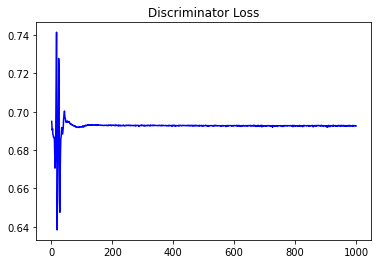

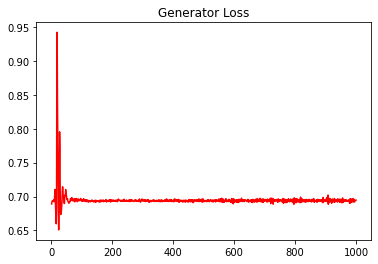

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04956982642826447


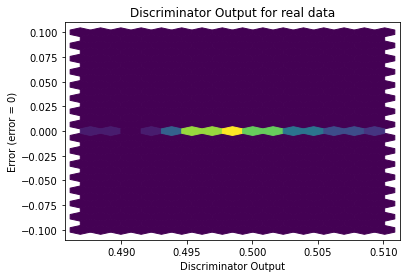

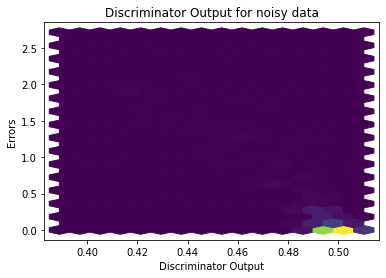

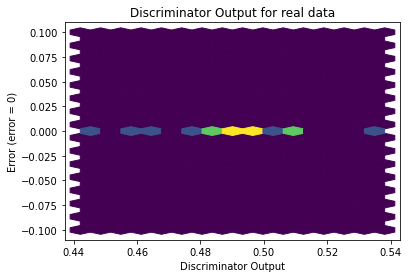

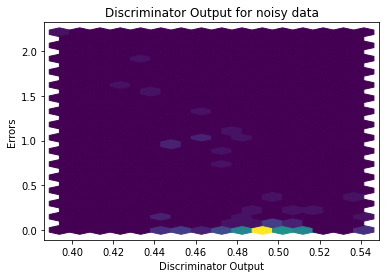

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


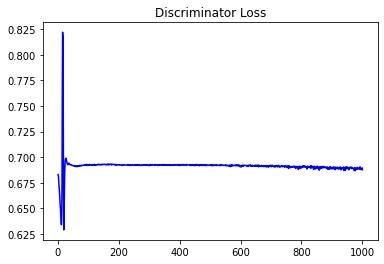

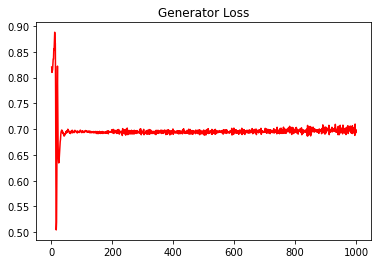

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08410577467245939


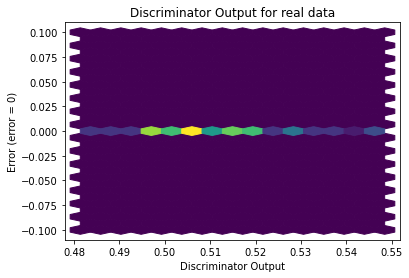

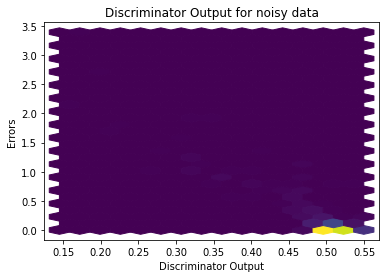

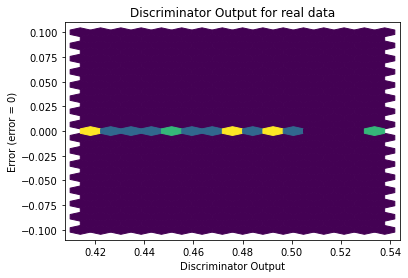

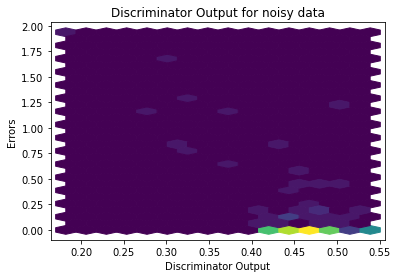

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0898]], requires_grad=True)
